# Tutorial de Iphyton Notebook

In [1]:
print "hello world"

hello world


In [2]:
1+1

2

In [ ]:
# this is a comment

## Cálculos Generales

## Uso de numpy

In [3]:
import numpy

numpy.pi


3.141592653589793

In [4]:
numpy.sqrt(2)

1.4142135623730951

In [5]:
b = numpy.sqrt(2)
b

1.4142135623730951

In [6]:
# Chequeo de precisión:
b**2

2.0000000000000004

#### Otra forma de llamar a numpy

In [7]:
import numpy as np

np.pi

3.141592653589793

#### Una forma mas

In [8]:
from numpy import pi

pi

3.141592653589793

#### Ultima forma (no recomendada)

In [9]:
from numpy import *

sqrt(2)

1.4142135623730951

## Vectores y Listas

In [10]:
x = linspace( 0, 2 * pi , 100 ) 

# algunos elementos de x:
x[0],x[49],x[50],x[99]


(0.0, 3.1098593944626236, 3.1733259127169631, 6.2831853071795862)

In [11]:
f = sin(x)
f[0],f[49],f[50], f[99]

(0.0, 0.031727933498067656, -0.031727933498067858, -2.4492935982947064e-16)

In [ ]:
# operaciones con el vector
x2=x*2
x2[0],x2[49],x2[50],x2[99]

## Funciones

In [ ]:
def function_name(x):
    ff = (x**5 + 4*x**4 + 3*x**3 + 2*x**2 + x + 1)*exp(-x**2)
    return ff

## Gráficos

In [8]:
from matplotlib.pyplot import plot,grid,show

In [ ]:
x = np.linspace(-2, 2, 200)
y = function_name(x)
plot(x, y)  
grid(True) 
show()

In [ ]:
y2 = (x**3)*exp(-x**2)
plot(x, y)  
plot(x,y2)
show()

In [ ]:
# Para hacer la figura en este notebook:
%matplotlib inline

plot(x, y)  
plot(x,y2)
show()

In [ ]:
# Para ver el gráfico en ventana separada
%matplotlib qt

plot(x, y)  
plot(x,y2)
show()

#### Exportar figura

In [7]:
from matplotlib.pyplot import savefig

plot(x, y)  
plot(x,y2)

savefig("figura1.png",dpi=72)

# existen muchos formatos de salida
plot(x, y)  
plot(x,y2)
savefig("figura1.pdf")


NameError: name 'x' is not defined

#### Estilos

In [6]:
from pylab import *
%matplotlib inline

plot(x, y, color='blue', linewidth=1.0, linestyle='--', label='y')  
plot(x,y2, color='red', linewidth=1.0, linestyle='-', label='y2') 
legend(loc='upper left')
show()

NameError: name 'x' is not defined

In [ ]:
plot(x, y, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=1);

In [5]:
import numpy as np

# Otro ejemplo: gráfico de distribución aleatoria

n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X)

axes([0.025,0.025,0.95,0.95])

xlim(-1.5,1.5), xticks([])
ylim(-1.5,1.5), yticks([]);
# savefig('../figures/scatter_ex.png',dpi=48)

# s: size, c: color , alpha: intensity?

scatter(X,Y, s=40, c=T, alpha=0.6);


NameError: name 'axes' is not defined

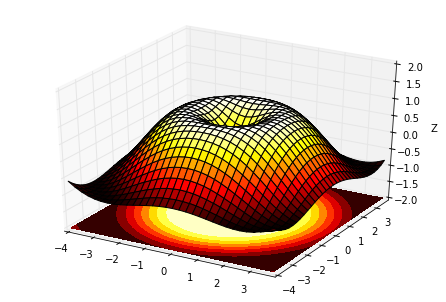

In [9]:
# 3-d Plot

from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot)
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=cm.hot)
ax.set_zlabel('Z')
ax.set_zlim(-2,2)
show()

#### Animaciones

In [3]:
%matplotlib qt

# Animación de Decaimiento 1-d
# Tomado del gallery de matplotlib


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)
data_gen.t = 0

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(0, 5)
ax.grid()
xdata, ydata = [], []
def run(data):
    # update the data
    t,y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10,
    repeat=False)
plt.show()

In [1]:
%matplotlib qt

# Animación 3-d
# Tomado del gallery de matplotlib

# Se puede girar la figura con el mouse


from __future__ import print_function
"""
A very simple 'animation' of a 3D plot
"""
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import time

def generate(X, Y, phi):
    R = 1 - np.sqrt(X**2 + Y**2)
    return np.cos(2 * np.pi * X + phi) * R

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = np.linspace(-1, 1, 50)
ys = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(xs, ys)
Z = generate(X, Y, 0.0)

wframe = None
tstart = time.time()
for phi in np.linspace(0, 360 / 2 / np.pi, 100):

    oldcol = wframe

    Z = generate(X, Y, phi)
    wframe = ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)

    # Remove old line collection before drawing
    if oldcol is not None:
        ax.collections.remove(oldcol)

    plt.pause(.001)

print ('FPS: %f' % (100 / (time.time() - tstart)))

FPS: 28.768103


/usr/lib/pymodules/python2.7/matplotlib/backend_bases.py:2407: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)
